<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/NLP_Fundamentals_Follow_Through.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [1]:
# Check for GPU
!nvidia-smi

Sat Jun 24 03:12:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [3]:
# Helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-06-24 03:12:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-24 03:12:18 (75.1 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [4]:
# The dataset (disaster or not disaster from tweets)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
unzip_data('nlp_getting_started.zip')

--2023-06-24 03:12:18--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 142.251.170.128, 173.194.174.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.3’

nlp_getting_started 100%[===================>] 593.11K  1004KB/s    in 0.6s    

2023-06-24 03:12:18 (1004 KB/s) - ‘nlp_getting_started.zip.3’ saved [607343/607343]



# Exploratory Data Analysis

In [5]:
train_df = pd.read_csv('train.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
tally = train_df['target'].value_counts()

print("Train dataset target occurences")
print(f"No(%): {tally[0]} ({tally[0]/tally.sum() * 100:.2f}%)")
print(f"Yes(%): {tally[1]} ({tally[1]/tally.sum() * 100:.2f}%)")

Train dataset target occurences
No(%): 4342 (57.03%)
Yes(%): 3271 (42.97%)


# Split train and validation set

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['target'],
                                                  shuffle=True,
                                                  test_size=0.1,
                                                  random_state = 42)
len(X_train), len(y_train), len(X_val), len(y_val)

(6851, 6851, 762, 762)

In [8]:
pd.concat([X_train, y_train], axis=1).head(15)

,text,target
4620,'McFadden Reportedly to Test Hamstring Thursda...,0
2858,w--=-=-=-[ NEMA warns Nigerians to prepare for...,1
3098,When I was cooking earlier I got electrocuted ...,0
3751,I'm On Fire. http://t.co/WATsmxYTVa,0
5285,More than 40 families affected by the fatal ou...,1
5863,Why do u ruin everything? @9tarbox u ruined t...,0
4827,http://t.co/c1H7JECFrV @RoyalCarribean do your...,1
5190,WACKOES like #MicheleBachman predict the WORLD...,0
5784,@Reuters people like you should be charged aft...,0
4369,Remove the http://t.co/2nS5TfnxpA and Linkury ...,0


In [9]:
pd.concat([X_val, y_val], axis=1).head(15)

,text,target
2644,So you have a new weapon that can cause un-ima...,1
2227,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,Aftershock back to school kick off was great. ...,0
6845,in response to trauma Children of Addicts deve...,0
5559,@Calum5SOS you look like you got caught in a r...,0
1765,my favorite lady came to our volunteer meeting...,1
1817,@brianroemmele UX fail of EMV - people want to...,1
6810,Can't find my ariana grande shirt this is a f...,0
4398,The Murderous Story Of AmericaÛªs First Hijac...,1


# Play with TextVectorization

In [10]:
round(sum([len(stmt.split()) for stmt in X_train])/len(X_train))

15

In [11]:
VOCAB_SIZE = 2500
VECTOR_OUTPUT_LENGTH = 18
EMBEDDING_OUTPUT_DIMS = 256

vectorizer = tf.keras.layers.TextVectorization(
  max_tokens = VOCAB_SIZE,
  output_mode = 'int',
  output_sequence_length=15,
  name='vectorizer_layer'
)

In [12]:
vocab = vectorizer.get_vocabulary()
len(vocab)

2

In [13]:
# fit vectorizer to X_train
vectorizer.adapt(X_train)

In [14]:
vocab = vectorizer.get_vocabulary()
len(vocab)

2500

In [15]:
vocab[:15], vocab[-15:]

(['',
  '[UNK]',
  'the',
  'a',
  'in',
  'to',
  'of',
  'and',
  'i',
  'is',
  'for',
  'on',
  'you',
  'my',
  'with'],
 ['evil',
  'everyones',
  'estimated',
  'eruption',
  'error',
  'entertainment',
  'enemy',
  'emotionally',
  'elephant',
  'electrical',
  'election',
  'efforts',
  'education',
  'edition',
  'dvd'])

In [16]:
vectorizer([X_train[72]])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 980, 2381,  921,  132,    4,    1,   11,    1,  794,  218,    1,
        1188,   43,    1,  921]])>

In [17]:
original_stmt = X_train[72]
reconstructed_stmt = " ".join([ vocab[i] for i in vectorizer([X_train[72]])[0] ])

print(f"Original      > {original_stmt}")
print(f"Reconstructed > {reconstructed_stmt}")

Original      > Reported motor vehicle accident in Curry on Herman Rd near Stephenson involving an overturned vehicle. Please use... http://t.co/YbJezKuRW1
Reconstructed > reported motor vehicle accident in [UNK] on [UNK] rd near [UNK] involving an [UNK] vehicle


# Play with Embedding

In [18]:
def make_embedding():
  return tf.keras.layers.Embedding(
      input_dim=len(vocab),
      output_dim=32,
      input_length=101,
      name='embedding_layer'
  )

embedding = make_embedding()

In [19]:
X_train[72]

'Reported motor vehicle accident in Curry on Herman Rd near Stephenson involving an overturned vehicle. Please use... http://t.co/YbJezKuRW1'

In [20]:
embedding(vectorizer([X_train[72]]))

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[-0.01475043, -0.01694604,  0.04741322, -0.00606284,
          0.02107242,  0.02810481,  0.02561981,  0.04279951,
          0.01635612, -0.03636377, -0.01497625, -0.03939911,
         -0.04344671,  0.04950846,  0.01218475,  0.03929272,
          0.04351385, -0.00157704,  0.03504367, -0.01330187,
         -0.01474987, -0.02464255, -0.04312983, -0.03904706,
          0.00830819, -0.04171522,  0.03744984,  0.03381176,
          0.01493   , -0.01159974, -0.04144695,  0.02742407],
        [ 0.03640211,  0.04716649, -0.01978656,  0.00613598,
          0.0245691 ,  0.02725332, -0.03010248,  0.03033478,
          0.00931532,  0.00177376, -0.0123304 ,  0.0478921 ,
          0.03067322, -0.00533286, -0.04658258,  0.04468527,
         -0.00126269, -0.04738606,  0.03813433, -0.00603832,
          0.04618019,  0.01575079, -0.01125496, -0.01414745,
         -0.01025898,  0.03387037, -0.00158987, -0.04149585,
          0.01831341,  0.048404

# Modelling


## Model 0 (Baseline): Naive Bayes with TF-IDF encoder

In [21]:
def build_model_0(X, y):
  from sklearn.pipeline import Pipeline
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.naive_bayes import MultinomialNB

  model = Pipeline([
      ('vectorizer', TfidfVectorizer()),
      ('clf', MultinomialNB())
  ])
  model.fit(X, y)

  return model


model_0 = build_model_0(X_train, y_train)

In [22]:
model_0_preds = model_0.predict(X_val)

model_0_preds.shape, model_0_preds[:15]

((762,), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]))

In [23]:
def score_predictions(y_true, y_pred):
  from sklearn.metrics import accuracy_score, precision_recall_fscore_support

  accuracy = accuracy_score(y_true, y_pred)
  precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  return {
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1': f1
  }

model_0_scores = score_predictions(y_val, model_0_preds)
model_0_scores

{'accuracy': 0.7782152230971129,
 'precision': 0.792992256322435,
 'recall': 0.7782152230971129,
 'f1': 0.7703527809038113}

## Model 1: Feed-forwared neural network

In [24]:
def build_model_1(X, y):
  from tensorflow.keras.layers import Input, TextVectorization, Embedding, Dense, GlobalAveragePooling1D
  model = tf.keras.Sequential()
  inputs = Input(shape=(1, ), dtype=tf.string)
  model.add(inputs)
  model.add(vectorizer)

  embedding = make_embedding()
  model.add(embedding)

  pool = GlobalAveragePooling1D()
  model.add(pool)

  output = Dense(1, activation='sigmoid')
  model.add(output)

  return model

model_1 = build_model_1(X_train, y_train)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 80,033
Trainable params: 80,033
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

model_1.fit(X_train, y_train,
            epochs=10,
            validation_data=(X_val, y_val)
            )

Epoch 1/10
215/215 [==============================] - 29s 115ms/step - loss: 0.6514 - accuracy: 0.6320 - val_loss: 0.6142 - val_accuracy: 0.6929
Epoch 2/10
215/215 [==============================] - 3s 14ms/step - loss: 0.5502 - accuracy: 0.7523 - val_loss: 0.5393 - val_accuracy: 0.7717
Epoch 3/10
215/215 [==============================] - 1s 7ms/step - loss: 0.4715 - accuracy: 0.8046 - val_loss: 0.5050 - val_accuracy: 0.7874
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.4248 - accuracy: 0.8208 - val_loss: 0.4890 - val_accuracy: 0.7822
Epoch 5/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3932 - accuracy: 0.8383 - val_loss: 0.4824 - val_accuracy: 0.7913
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.3701 - accuracy: 0.8440 - val_loss: 0.4819 - val_accuracy: 0.7913
Epoch 7/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3512 - accuracy: 0.8532 - val_loss: 0.4828 - val_accuracy: 0.7887
Ep

In [26]:
model_1_preds = model_1.predict(X_val)

model_1_preds.shape, model_1_preds[:15]

24/24 [==============================] - 0s 2ms/step


((762, 1),
 array([[0.03417928],
        [0.1786166 ],
        [0.6779139 ],
        [0.01957888],
        [0.66259295],
        [0.18167534],
        [0.0561069 ],
        [0.43671578],
        [0.17490943],
        [0.80937445],
        [0.8048919 ],
        [0.44726437],
        [0.0501304 ],
        [0.42123988],
        [0.2893127 ]], dtype=float32))

In [27]:
model_1_preds = tf.squeeze(tf.round(model_1_preds))
model_1_preds[:15]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
      dtype=float32)>

In [28]:
model_1_scores = score_predictions(y_val, model_1_preds)
model_1_scores

{'accuracy': 0.7847769028871391,
 'precision': 0.7846453978359578,
 'recall': 0.7847769028871391,
 'f1': 0.7832917661310436}

### Visualizing embedding


In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 80,033
Trainable params: 80,033
Non-trainable params: 0
_________________________________________________________________


In [30]:
def download_embedding(model):
  import io
  weights = model.get_layer("embedding_layer").get_weights()[0]
  vocab = model.get_layer("vectorizer_layer").get_vocabulary()

  out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
  out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

  for index, word in enumerate(vocab):
    if index == 0:
      continue
    vec = weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + '\n')

  out_v.close()
  out_m.close()

  # try:
  #   from google.colab import files
  #   files.download('vectors.tsv')
  #   files.download('metadata.tsv')
  # except Exception:
  #   pass

# download_embedding(model_1)

## Model 2: LSTM (RNN)

In [31]:
from tensorflow.keras.layers import Input, Dense, LSTM

def build_model_2():
  return tf.keras.Sequential([
      Input(shape=(1, ), dtype=tf.string),
      vectorizer,
      make_embedding(),
      LSTM(256, return_sequences=True),
      LSTM(256),
      Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ], name='model_2')

model_2 = build_model_2()
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 lstm (LSTM)                 (None, 15, 256)           295936    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                           

In [32]:
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_2_history = model_2.fit(X_train, y_train,
                              epochs=5,
                              validation_split=0.2)

Epoch 1/5
172/172 [==============================] - 16s 68ms/step - loss: 0.5287 - accuracy: 0.7392 - val_loss: 0.4716 - val_accuracy: 0.7783
Epoch 2/5
172/172 [==============================] - 3s 15ms/step - loss: 0.3760 - accuracy: 0.8403 - val_loss: 0.5247 - val_accuracy: 0.7702
Epoch 3/5
172/172 [==============================] - 4s 21ms/step - loss: 0.3311 - accuracy: 0.8646 - val_loss: 0.5010 - val_accuracy: 0.7702
Epoch 4/5
172/172 [==============================] - 2s 14ms/step - loss: 0.2855 - accuracy: 0.8827 - val_loss: 0.6023 - val_accuracy: 0.7549
Epoch 5/5
172/172 [==============================] - 2s 12ms/step - loss: 0.2562 - accuracy: 0.9044 - val_loss: 0.6657 - val_accuracy: 0.7666


<Axes: >

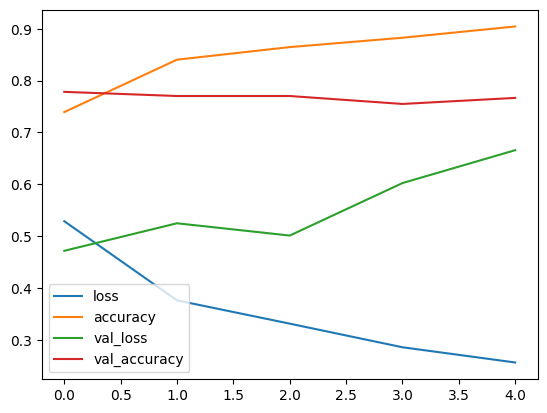

In [33]:
pd.DataFrame(model_2_history.history).plot()

In [34]:
model_2_predictions = tf.squeeze(tf.round(model_2.predict(X_val)))

model_2_predictions[:15]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)>

In [35]:
model_2_scores = score_predictions(y_val, model_2_predictions)
model_2_scores

{'accuracy': 0.7598425196850394,
 'precision': 0.7599570913500314,
 'recall': 0.7598425196850394,
 'f1': 0.75740278537249}

## Model 3: GRU (RNN)

In [36]:
from tensorflow.keras.layers import GRU

def build_model_3():
  return tf.keras.Sequential([
      Input(shape=(1,), dtype=tf.string),
      vectorizer,
      make_embedding(),
      GRU(64, return_sequences=True),
      GRU(64),
      Dense(1, activation='sigmoid')
  ], name='model_3')

model_3 = build_model_3()
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 gru (GRU)                   (None, 15, 64)            18816     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 123,841
Trainable params: 123,841
Non-trainable params: 0
_____________________________________________________

In [37]:
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3_history = model_3.fit(X_train, y_train,
                              epochs=5,
                              validation_split=0.2)

Epoch 1/5
172/172 [==============================] - 15s 58ms/step - loss: 0.5592 - accuracy: 0.7046 - val_loss: 0.5043 - val_accuracy: 0.7659
Epoch 2/5
172/172 [==============================] - 4s 22ms/step - loss: 0.3796 - accuracy: 0.8339 - val_loss: 0.4732 - val_accuracy: 0.7732
Epoch 3/5
172/172 [==============================] - 3s 15ms/step - loss: 0.3226 - accuracy: 0.8651 - val_loss: 0.5364 - val_accuracy: 0.7666
Epoch 4/5
172/172 [==============================] - 2s 12ms/step - loss: 0.2878 - accuracy: 0.8843 - val_loss: 0.5222 - val_accuracy: 0.7622
Epoch 5/5
172/172 [==============================] - 2s 10ms/step - loss: 0.2570 - accuracy: 0.8967 - val_loss: 0.6412 - val_accuracy: 0.7666


<Axes: >

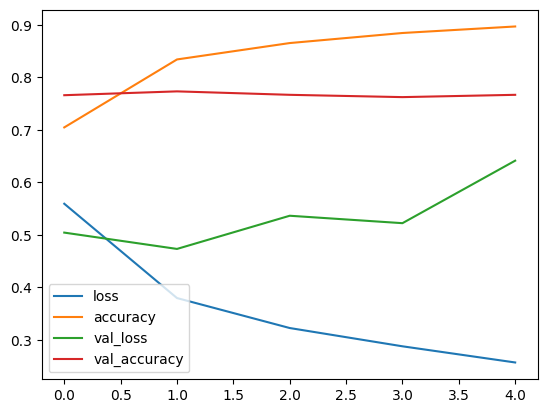

In [38]:
pd.DataFrame(model_3_history.history).plot()

In [39]:
model_3_predictions = tf.squeeze(tf.round(model_3.predict(X_val)))

model_3_predictions[:15]

24/24 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
      dtype=float32)>

In [40]:
model_3_scores = score_predictions(y_val, model_3_predictions)
model_3_scores

{'accuracy': 0.7572178477690289,
 'precision': 0.7564045836913847,
 'recall': 0.7572178477690289,
 'f1': 0.7563338207889505}

## Model 4: Bidirectional-LSTM (RNN)

In [41]:
from tensorflow.keras.layers import Bidirectional

def build_model_4():
  return tf.keras.Sequential([
      Input(shape=(1,), dtype=tf.string),
      vectorizer,
      make_embedding(),
      Bidirectional(LSTM(64)),
      Dense(1, activation='sigmoid')
  ])

model_4 = build_model_4()
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 129,793
Trainable params: 129,793
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_4_history = model_4.fit(X_train, y_train,
            epochs=5,
            validation_split=0.2)

Epoch 1/5
172/172 [==============================] - 15s 65ms/step - loss: 0.5379 - accuracy: 0.7155 - val_loss: 0.4926 - val_accuracy: 0.7710
Epoch 2/5
172/172 [==============================] - 3s 17ms/step - loss: 0.3635 - accuracy: 0.8440 - val_loss: 0.4852 - val_accuracy: 0.7681
Epoch 3/5
172/172 [==============================] - 3s 15ms/step - loss: 0.3076 - accuracy: 0.8701 - val_loss: 0.5359 - val_accuracy: 0.7651
Epoch 4/5
172/172 [==============================] - 2s 12ms/step - loss: 0.2591 - accuracy: 0.8938 - val_loss: 0.5591 - val_accuracy: 0.7739
Epoch 5/5
172/172 [==============================] - 2s 11ms/step - loss: 0.2175 - accuracy: 0.9170 - val_loss: 0.6735 - val_accuracy: 0.7681


<Axes: >

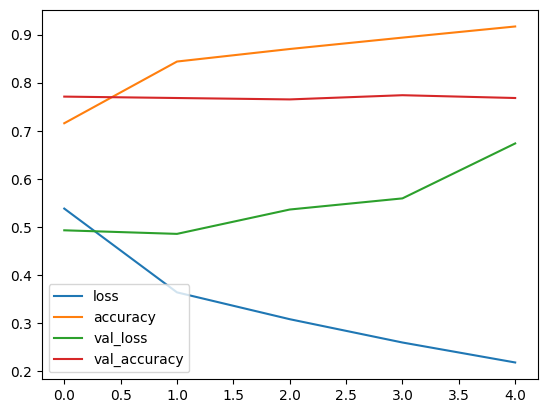

In [43]:
pd.DataFrame(model_4_history.history).plot()

In [44]:
model_4_predictions = tf.squeeze(tf.round(model_4.predict(X_val)))

model_4_predictions[:15]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.],
      dtype=float32)>

In [45]:
model_4_scores = score_predictions(y_val, model_4_predictions)
model_4_scores

{'accuracy': 0.7388451443569554,
 'precision': 0.7378781763195409,
 'recall': 0.7388451443569554,
 'f1': 0.7371144258563167}

## Model 5: 1D Convolutional Network

In [46]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D

def build_model_5():
  return tf.keras.Sequential([
      Input(shape=(1,), dtype=tf.string),
      vectorizer,
      make_embedding(),
      Conv1D(64, 5, padding='same'),
      GlobalAveragePooling1D(),
      Dense(1, activation='sigmoid')
  ])

model_5 = build_model_5()
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorizer_layer (TextVecto  (None, 15)               0         
 rization)                                                       
                                                                 
 embedding_layer (Embedding)  (None, 15, 32)           80000     
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            10304     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 90,369
Trainable params: 90,369
Non-trai

In [47]:
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_5_history = model_5.fit(X_train, y_train,
                              epochs=5,
                              validation_split=0.2)

Epoch 1/5
172/172 [==============================] - 12s 58ms/step - loss: 0.5593 - accuracy: 0.7049 - val_loss: 0.4824 - val_accuracy: 0.7819
Epoch 2/5
172/172 [==============================] - 2s 10ms/step - loss: 0.3809 - accuracy: 0.8349 - val_loss: 0.4906 - val_accuracy: 0.7775
Epoch 3/5
172/172 [==============================] - 2s 11ms/step - loss: 0.3194 - accuracy: 0.8651 - val_loss: 0.5390 - val_accuracy: 0.7739
Epoch 4/5
172/172 [==============================] - 2s 13ms/step - loss: 0.2835 - accuracy: 0.8825 - val_loss: 0.5950 - val_accuracy: 0.7695
Epoch 5/5
172/172 [==============================] - 1s 9ms/step - loss: 0.2646 - accuracy: 0.8870 - val_loss: 0.6327 - val_accuracy: 0.7673


<Axes: >

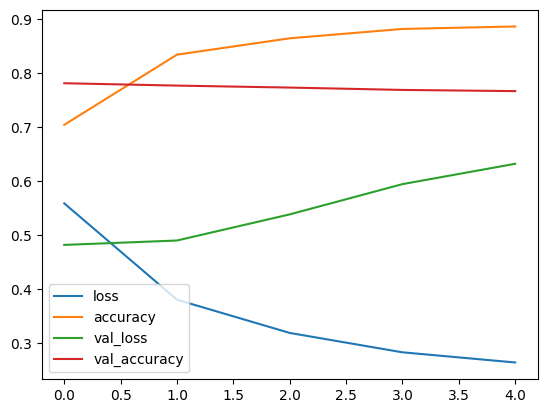

In [48]:
pd.DataFrame(model_5_history.history).plot()

In [49]:
model_5_preds = tf.squeeze(tf.round(model_5.predict(X_val)))

model_5_preds[:10]

24/24 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [50]:
model_5_scores = score_predictions(y_val, model_5_preds)
model_5_scores

{'accuracy': 0.7598425196850394,
 'precision': 0.7591632917596652,
 'recall': 0.7598425196850394,
 'f1': 0.7583794864350266}

## Model 6: Tensorflow Hub Pretrained Feature Extractor

In [51]:
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dense

In [52]:
USE_EMBEDDING_URL = 'https://tfhub.dev/google/universal-sentence-encoder/4'
use_embedding = hub.load(USE_EMBEDDING_URL)
use_embedding

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7f074413b370>

In [53]:
test_embedded = use_embedding(["I count the ways I let you down on my fingers and toes but I'm running out"])

test_embedded.shape

TensorShape([1, 512])

In [54]:
 test_embedded[0][:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.05152836, -0.0797766 ,  0.02880961, -0.06830648, -0.05156579,
       -0.06153592, -0.03692615,  0.02923982, -0.0400302 ,  0.05261124,
        0.01473092, -0.00092247,  0.06600689,  0.03393423,  0.01559333,
       -0.0966397 ,  0.03267927,  0.0396901 ,  0.02357508,  0.03656178,
       -0.01441673, -0.02353454, -0.03026883,  0.07269056, -0.04184369,
       -0.01739119, -0.05978658,  0.06395315,  0.03783267,  0.00367775,
        0.00468047,  0.01728156,  0.00832868,  0.08485894,  0.04183052,
       -0.0273976 ,  0.00144963,  0.08900499, -0.04708766, -0.02448264,
        0.03425295, -0.0039532 , -0.05639005,  0.04587052,  0.04004254,
       -0.02395528, -0.11212742,  0.01624875, -0.02183451, -0.07293732],
      dtype=float32)>

In [55]:
def build_model_6():
  return tf.keras.Sequential([
      Input(shape=[], dtype=tf.string),
      hub.KerasLayer(USE_EMBEDDING_URL, trainable=False),
      Dense(128, activation='relu'),
      # Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

model_6 = build_model_6()
model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [56]:
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_6_history = model_6.fit(X_train, y_train,
            epochs=10,
            validation_split=0.2)

Epoch 1/10
172/172 [==============================] - 6s 17ms/step - loss: 0.4977 - accuracy: 0.7911 - val_loss: 0.4482 - val_accuracy: 0.7943
Epoch 2/10
172/172 [==============================] - 3s 18ms/step - loss: 0.4111 - accuracy: 0.8199 - val_loss: 0.4405 - val_accuracy: 0.8060
Epoch 3/10
172/172 [==============================] - 3s 15ms/step - loss: 0.3937 - accuracy: 0.8274 - val_loss: 0.4377 - val_accuracy: 0.8096
Epoch 4/10
172/172 [==============================] - 3s 15ms/step - loss: 0.3808 - accuracy: 0.8334 - val_loss: 0.4379 - val_accuracy: 0.8096
Epoch 5/10
172/172 [==============================] - 2s 13ms/step - loss: 0.3709 - accuracy: 0.8398 - val_loss: 0.4402 - val_accuracy: 0.8045
Epoch 6/10
172/172 [==============================] - 3s 16ms/step - loss: 0.3593 - accuracy: 0.8447 - val_loss: 0.4413 - val_accuracy: 0.8067
Epoch 7/10
172/172 [==============================] - 3s 18ms/step - loss: 0.3499 - accuracy: 0.8493 - val_loss: 0.4450 - val_accuracy: 0.8060

<Axes: >

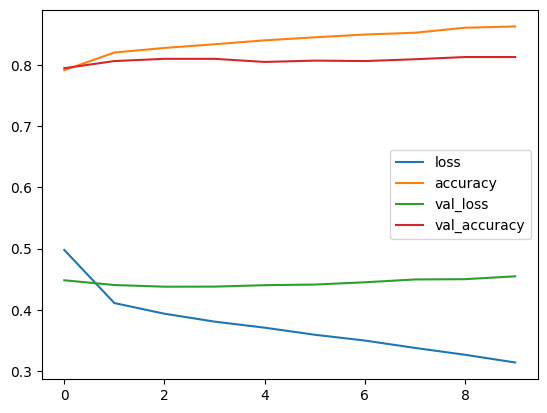

In [57]:
pd.DataFrame(model_6_history.history).plot()

In [58]:
model_6_preds = tf.squeeze(tf.round(model_6.predict(X_val)))

model_6_preds[:15]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [59]:
model_6_scores = score_predictions(y_val, model_6_preds)
model_6_scores

{'accuracy': 0.8123359580052494,
 'precision': 0.8119978197351921,
 'recall': 0.8123359580052494,
 'f1': 0.8116526290422699}

## Model 7: TensorFlow Hub PretrainedFEature Extrator with 10% of data

### Sample 10% of the data

In [60]:
train_df.shape

(7613, 5)

In [61]:
# This has data leakage as we're getting our 10% data sample from the `train_df`
#   itself, which is where we extract our validation data set too!

# train_df_10_percent = train_df.sample(frac=0.1, random_state=42)
# train_df_10_percent.shape, train_df.head()

In [62]:
# This has data leakage as we're getting our 10% data sample from the `train_df`
#   itself, which is where we extract our validation data set too!

whole_train_df = pd.DataFrame()
# whole_train_df[['text', 'target']] = X_train, y_train
whole_train_df['text'] = X_train
whole_train_df['target'] = y_train
# whole_train_df.shape, whole_train_df.head(5)

# len(X_train), len(y_train),
whole_train_df.head(15)

,text,target
4620,'McFadden Reportedly to Test Hamstring Thursda...,0
2858,w--=-=-=-[ NEMA warns Nigerians to prepare for...,1
3098,When I was cooking earlier I got electrocuted ...,0
3751,I'm On Fire. http://t.co/WATsmxYTVa,0
5285,More than 40 families affected by the fatal ou...,1
5863,Why do u ruin everything? @9tarbox u ruined t...,0
4827,http://t.co/c1H7JECFrV @RoyalCarribean do your...,1
5190,WACKOES like #MicheleBachman predict the WORLD...,0
5784,@Reuters people like you should be charged aft...,0
4369,Remove the http://t.co/2nS5TfnxpA and Linkury ...,0


In [63]:
train_df_10_percent = whole_train_df.sample(frac=0.1, random_state=42)
train_df_10_percent.shape, train_df.head()

((685, 2),
    id keyword location                                               text  \
 0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
 1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
 2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
 3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
 4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
 
    target  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  )

In [64]:
train_df_10_percent['target'].value_counts()

0    391
1    294
Name: target, dtype: int64

In [65]:
# X_train_10_perc, X_val_10_perc, y_train_10_perc,y_val_10_perc = train_test_split(
#     train_df_10_percent['text'], train_df_10_percent['target'],
#     test_size=0.2,
#     random_state=42)

# X_train_10_perc.shape, X_val_10_perc.shape, y_train_10_perc.shape, \
#   y_val_10_perc.shape

In [66]:
X_train_10_perc = train_df_10_percent['text']
y_train_10_perc = train_df_10_percent['target']

X_train_10_perc.shape, y_train_10_perc.shape,

((685,), (685,))

### Train model 7 (same as model 6) with 10% data

In [67]:
# we could have cloned trained model_6 via:
#     model_7 = tf.keras.models.clone_model(model_6)
model_7 = build_model_6()

model_7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [68]:
model_7.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_7_history = model_7.fit(X_train_10_perc, y_train_10_perc,
                              epochs=10,
                              validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 4s 52ms/step - loss: 0.6730 - accuracy: 0.6788 - val_loss: 0.6555 - val_accuracy: 0.6715
Epoch 2/10
18/18 [==============================] - 0s 27ms/step - loss: 0.5990 - accuracy: 0.8157 - val_loss: 0.6021 - val_accuracy: 0.7445
Epoch 3/10
18/18 [==============================] - 0s 25ms/step - loss: 0.5202 - accuracy: 0.8358 - val_loss: 0.5552 - val_accuracy: 0.7956
Epoch 4/10
18/18 [==============================] - 0s 23ms/step - loss: 0.4555 - accuracy: 0.8431 - val_loss: 0.5387 - val_accuracy: 0.8029
Epoch 5/10
18/18 [==============================] - 1s 28ms/step - loss: 0.4096 - accuracy: 0.8431 - val_loss: 0.5413 - val_accuracy: 0.7810
Epoch 6/10
18/18 [==============================] - 0s 15ms/step - loss: 0.3776 - accuracy: 0.8504 - val_loss: 0.5420 - val_accuracy: 0.7591
Epoch 7/10
18/18 [==============================] - 0s 16ms/step - loss: 0.3522 - accuracy: 0.8558 - val_loss: 0.5513 - val_accuracy: 0.7445
Epoch 8/10
18

<Axes: >

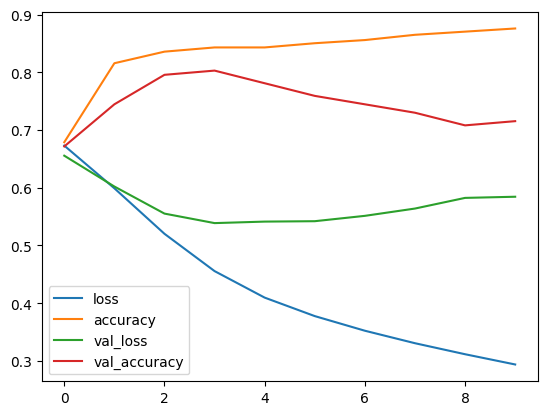

In [69]:
pd.DataFrame(model_7_history.history).plot()

In [70]:
model_7_preds = tf.squeeze(tf.round(model_7.predict(X_val)))

model_7_preds[:15]

24/24 [==============================] - 1s 9ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
      dtype=float32)>

In [71]:
model_7_scores = score_predictions(y_val, model_7_preds)
model_7_scores

{'accuracy': 0.7847769028871391,
 'precision': 0.7842138433288723,
 'recall': 0.7847769028871391,
 'f1': 0.7842269740851211}

# Visualizing model performance

In [79]:
all_scores = pd.DataFrame({
    '[0] MultiNB': model_0_scores,
    '[1] Generic ANN': model_1_scores,
    '[2] LSTM': model_2_scores,
    '[3] GRU': model_3_scores,
    '[4] Bidirectional': model_4_scores,
    '[5] Conv1D': model_5_scores,
    '[6] Pre-trained USE': model_6_scores,
    '[7] Pre-trained USE (10%)': model_7_scores,
})

all_scores.transpose()

,accuracy,precision,recall,f1
[0] MultiNB,0.778215,0.792992,0.778215,0.770353
[1] Generic ANN,0.784777,0.784645,0.784777,0.783292
[2] LSTM,0.759843,0.759957,0.759843,0.757403
[3] GRU,0.757218,0.756405,0.757218,0.756334
[4] Bidirectional,0.738845,0.737878,0.738845,0.737114
[5] Conv1D,0.759843,0.759163,0.759843,0.758379
[6] Pre-trained USE,0.812336,0.811998,0.812336,0.811653
[7] Pre-trained USE (10%),0.784777,0.784214,0.784777,0.784227


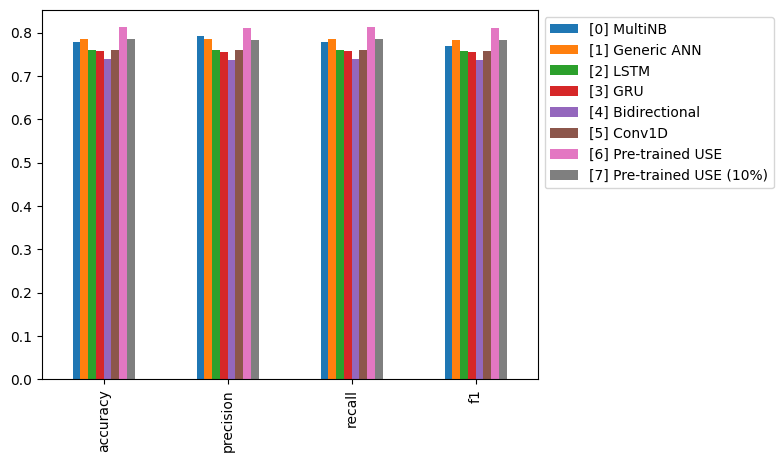

In [82]:
all_scores.plot(kind='bar').legend(bbox_to_anchor=(1.0, 1.0))

# Peek at the most wrong
# PRedict test samples
